### 데이터 불러오시고

In [23]:
raw_data = pd.read_csv("vehicles.csv")

### 쓸 컬럼들만 지정해주신뒤에 

In [644]:
start_df = raw_data[['id','price','year','odometer','drive','fuel','manufacturer','state','title_status','transmission','type','paint_color','cylinders','vin']]

### 결측치를 날리고, 'vin'이 중복되는 값들을 제거하면

In [645]:
start_df = start_df.dropna(axis=0)
df = start_df.loc[start_df['vin'].drop_duplicates(keep='last').index]
df.shape

(77678, 14)

### 가격으로 정렬을 하겠습니다.

In [476]:
df = df.sort_values(by=['price'])

### 77339개 row가 됩니다.

- 혹시 몰라서 head, tail 찍어봤습니다. 혹시 순서가 다르게 들어가거나 하실수 있으니 한번씩 확인해 주세요.
- 제가 찍어둔거 말고 새로 찍어보셔서 비교해보시는 쪽으로 활용해 보세요!

In [27]:
df.tail()

,id,price,year,odometer,drive,fuel,manufacturer,state,title_status,transmission,type,paint_color,cylinders,model,vin
137539,7049108250,29800499,2015.0,80247.0,4wd,gas,chevrolet,co,clean,automatic,SUV,black,8 cylinders,tahoe,1GNSKAKC5FR224103
136896,7049332230,33880499,2015.0,94093.0,4wd,gas,ram,co,clean,automatic,pickup,black,8 cylinders,2500,3C6TR5EJ1FG500858
135433,7049807367,35880499,2015.0,100185.0,4wd,gas,gmc,co,clean,automatic,SUV,white,8 cylinders,yukon,1GKS2CKJ1FR156048
137476,7049135226,36980499,2017.0,76770.0,4wd,gas,chevrolet,co,clean,automatic,pickup,white,8 cylinders,silverado 1500,3GCUKTEJ1HG369617
264595,7046597433,3567587328,2000.0,177500.0,fwd,gas,volkswagen,md,clean,manual,hatchback,silver,4 cylinders,golf,WVWGC21J4YW740636


In [28]:
df.head()

,id,price,year,odometer,drive,fuel,manufacturer,state,title_status,transmission,type,paint_color,cylinders,model,vin
254663,7037868565,0,2010.0,147979.0,rwd,gas,toyota,la,clean,automatic,truck,blue,8 cylinders,tundra 2wd truck,5TFEY5F18AX087831
238633,7048034848,0,2016.0,66303.0,fwd,gas,chevrolet,ia,clean,automatic,sedan,silver,4 cylinders,malibu limited,1G11C5SA2GU129304
238634,7048034727,0,2009.0,154789.0,4wd,gas,ford,ia,clean,automatic,SUV,blue,6 cylinders,edge,2FMDK48C49BA35598
239069,7041888656,0,1994.0,275000.0,4wd,gas,ram,ia,clean,automatic,pickup,white,8 cylinders,2500 long box,17F26Z3RS667787
239095,7041278199,0,2014.0,66422.0,fwd,gas,chrysler,ia,clean,automatic,van,black,6 cylinders,town country,2C4RC1BG9ER454873


### 4명이서 나누면 대략

In [29]:
77339 / 4

19334.75

### 요런 느낌으로 하면 될것 같습니다.
- cho : 0~20000
- hong : 20000~40000
- bae : 40000~60000
- yu : 60000~

### [start_num:end_num] 에 시작과 끝 숫자를 넣어주시면 됩니다.

In [31]:
start_num = 0
end_num = 20

In [38]:
result_list2 = []
result = {}
# [start_num:end_num]에 각각 숫자를 넣어 주세요!
for i in df.sort_values(by=['odometer'],ascending=False)[['vin','odometer','price']][70459:].iterrows():
    vin = i[1][0]
    odometer = i[1][1]
    url = 'https://marketvalue.vinaudit.com/getmarketvalue.php?key=1HB7ICF9L0GVH5Q&vin={}&mileage={}&country=USA'.format(vin, odometer)
    response = requests.get(url)
    jsonresponse = response.json()
    for k, v in jsonresponse.items():
        if k == 'prices':
            for key, value in v.items():
                result[key] = value
        else:
            result[k] = v

    result_list2.append(result)
    result = {}

- 작은 범위로 테스트 한번 해보시고 크롤링 해주시면 됩니다. 
- csv파일 저장되는 위치와 이름은 변경하셔도 됩니다.
- 중간에 혹시 멈추시거나 이상한 낌새가 보이신다면 kernel Interrupt 하시고 밑의 셀 실행하시면 
- 그때까지 크롤링된 데이터만 csv파일로 저장됩니다. 확인하신후 그 이후부터 다시 크롤링 진행하시는 식으로 몇번 반복하시면 될것 같습니다.

In [111]:
df1 = pd.DataFrame(result_list)

In [112]:
df2 = pd.DataFrame(result_list2)

In [113]:
df3 = pd.DataFrame(result_list3)

In [125]:
df4 = pd.DataFrame(result_list4)

In [159]:
df5 = pd.DataFrame(result_list5)

In [176]:
df6 = pd.DataFrame(result_list6)

In [188]:
df7 = pd.DataFrame(result_list7)

In [ ]:
### model 뺸상태의 df - 모델 넣은 상태의 df 만큼 크롤링 추가해서 붙여야 함

In [193]:
result_list8 = []
result = {}
# [start_num:end_num]에 각각 숫자를 넣어 주세요!
for i in df.sort_values(by=['odometer'],ascending=False)[['vin','odometer','price']][28500:30000].iterrows():
    vin = i[1][0]
    odometer = i[1][1]
    url = 'https://marketvalue.vinaudit.com/getmarketvalue.php?key=1HB7ICF9L0GVH5Q&vin={}&mileage={}&country=USA'.format(vin, odometer)
#     time.sleep(1)
    response = requests.get(url)
    jsonresponse = response.json()
    for k, v in jsonresponse.items():
        if k == 'prices':
            for key, value in v.items():
                result[key] = value
        else:
            result[k] = v

    result_list8.append(result)
    result = {}

In [194]:
df8 = pd.DataFrame(result_list8)

In [204]:
len(df8)

1500

In [195]:
vin_crawling_data = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8],axis=0)

In [359]:
len(vin_crawling_data)

48842

In [360]:
len(vin_crawling_data.iloc[vin_crawling_data['vin'].drop_duplicates(keep='last').index])

48787

In [196]:
vin_crawling_data.to_csv('./vin_crawling_data.csv')

In [197]:
len(vin_crawling_data)

48842

In [200]:
len(vin_crawling_data)

48842

In [206]:
77339 - 28500

48839

In [350]:
len(vin_crawling_data.iloc[vin_crawling_data['vin'].drop_duplicates(keep='last').index])

48787

In [230]:
len(df1),len(df2),len(df3),len(df4),len(df5),len(df6),len(df7)

(10459, 6880, 10000, 2778, 7224, 3916, 6085)

In [241]:
len(df1.iloc[df1['vin'].drop_duplicates(keep='last').index]),len(df2.iloc[df2['vin'].drop_duplicates(keep='last').index]),len(df3.iloc[df3['vin'].drop_duplicates(keep='last').index]),len(df4.iloc[df4['vin'].drop_duplicates(keep='last').index]),len(df5.iloc[df5['vin'].drop_duplicates(keep='last').index]),len(df6.iloc[df6['vin'].drop_duplicates(keep='last').index]),len(df7.iloc[df7['vin'].drop_duplicates(keep='last').index])

(10456, 6872, 9991, 2776, 7223, 3914, 6084)

In [247]:
vin_crawling_data[(vin_crawling_data['success']==False) & (vin_crawling_data['error'] == "invalid_vin")]

,above,average,below,certainty,count,error,mean,mileage,period,stdev,success,vehicle,vin
1,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN,IJ4FY49S3RP460640
3,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN,CS23N8C175987
30,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN,HUGSANDKISSES
72,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN,KNADM4A39G660968
106,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN,8G87F314385
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN,XYZ123678
1460,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN,4T3ZF13COYU173218
1469,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN,JTBN36F840173390
1471,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN,BO133572


In [260]:
vin_crawling_data[(vin_crawling_data['success']==False) & (vin_crawling_data['error'] == "invalid_vin") & (vin_crawling_data['vin'].notna())]

,above,average,below,certainty,count,error,mean,mileage,period,stdev,success,vehicle,vin
1,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN,IJ4FY49S3RP460640
3,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN,CS23N8C175987
30,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN,HUGSANDKISSES
72,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN,KNADM4A39G660968
106,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN,8G87F314385
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN,XYZ123678
1460,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN,4T3ZF13COYU173218
1469,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN,JTBN36F840173390
1471,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN,BO133572


In [269]:
vin_crawling_data['vin'].count()

48841

In [270]:
len(vin_crawling_data)

48842

In [272]:
vin_crawling_data[vin_crawling_data['vin'].isna()]

,above,average,below,certainty,count,error,mean,mileage,period,stdev,success,vehicle,vin
372,NaN,NaN,NaN,NaN,NaN,invalid_inputs,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [261]:
vin_crawling_data[(vin_crawling_data['success']==False) & (vin_crawling_data['error'] == "no_data")]

,above,average,below,certainty,count,error,mean,mileage,period,stdev,success,vehicle,vin
74,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,2001 BMW M Base,WBSCL93451LJ80754
89,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,1987 Chevrolet S10 (Regular Cab 2WD),1GCBS14E4H8118189
94,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,2006 Ford Escape Hybrid Base,1FMYU96H26KA20722
132,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,2003 Chevrolet C7c042,1GBM7J1C33F509811
169,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,1986 Ford Ranger (Regular Cab 4WD),1FTCR11T9GUB23378
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,2005 Volkswagen Passat (GLX 4Motion),WVWTU63B45E065008
1448,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,2004 Subaru Baja Turbo,4S4BT63C746101446
1450,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,,SEE CARFAX
1467,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,2004 Dodge Sprinter (2500 140 WB),WD5PD644245637226


# 최종 데이터 프레임 만들기

In [1012]:
last1= pd.read_csv('./crawlinf_raw_data/vin_crawling_data.csv')
len(last1)

48842

In [1013]:
last2 = pd.read_csv('./crawlinf_raw_data/20000-28500vin_crawling.csv')
len(last2)

8494

In [1014]:
last3 = pd.read_csv('./crawlinf_raw_data/vin_df.csv')
len(last3)

19979

In [1015]:
last4 = pd.read_csv('./crawlinf_raw_data/last4.csv')

In [1018]:
last1= pd.read_csv('./crawlinf_raw_data/vin_crawling_data.csv')
last2 = pd.read_csv('./crawlinf_raw_data/20000-28500vin_crawling.csv')
last3 = pd.read_csv('./crawlinf_raw_data/vin_df.csv')
last4 = pd.read_csv('./crawlinf_raw_data/last4.csv')


last = pd.concat([last1,last2,last3,last4])

# 대문자 변경
last['vin'] = last['vin'].str.upper()

# 중복제거
last_drop_dupli = last.drop_duplicates('vin',keep='first')
last_drop_dupli.shape

# 대문자 변경
df['vin'] = df['vin'].str.upper()

# merge
final = pd.merge(df,last_drop_dupli,on='vin')

# 중복 제거
final_drop_dupli = final.drop_duplicates('vin',keep='first')
final_drop_dupli.shape

# final_drop_dupli.to_csv('./final_vin_data.csv')

In [1019]:
# 중복제거
last_drop_dupli = last.drop_duplicates('vin',keep='first')
last_drop_dupli.shape

(77578, 17)

In [881]:
display(df[df.duplicated('vin')].sort_values(by=['vin']))

,id,price,year,odometer,drive,fuel,manufacturer,state,title_status,transmission,type,paint_color,cylinders,vin
122098,7049460991,9900,2011.0,185055.0,4wd,gas,ram,ca,clean,automatic,truck,white,8 cylinders,1D7RV1GT6BS562643
38213,7044037126,13955,2015.0,16295.0,fwd,gas,ford,wi,clean,automatic,sedan,white,4 cylinders,1FA6P0H70F5102536
493296,7036835464,68000,2017.0,56000.0,rwd,diesel,ford,tx,lien,automatic,truck,black,8 cylinders,1FT8W3DTXHEE78531
322291,7049107714,18995,2012.0,117500.0,4wd,gas,ford,mt,clean,automatic,truck,black,6 cylinders,1FTFW1ETXCFB60101
98422,7033556562,3750,1998.0,124641.0,rwd,gas,ford,ca,clean,manual,pickup,green,4 cylinders,1FTYR14C9WPA85827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486659,7034289041,36500,1958.0,2200.0,rwd,gas,chevrolet,tx,clean,automatic,truck,blue,8 cylinders,XXXXXXXXXXXXXXX
250473,7034487928,1500,2001.0,192001.0,4wd,gas,ford,ky,clean,automatic,SUV,red,8 cylinders,XXXXXXXXXXXXXXXX
471429,7048469059,3900,2002.0,250000.0,rwd,gas,chevrolet,tn,clean,automatic,pickup,black,6 cylinders,XXXXXXXXXXXXXXXXX
504045,7047846327,1500,1955.0,999999.0,rwd,gas,chevrolet,tx,missing,automatic,wagon,black,8 cylinders,YES


In [1020]:
# 대문자 변경
df['vin'] = df['vin'].str.upper()
df.shape

(77678, 14)

In [1021]:
# merge
final = pd.merge(df,last_drop_dupli,on='vin')

In [1022]:
final.shape

(77644, 30)

In [898]:
display(final[final['vin'].duplicated()]['vin'].value_counts())

UPON REQUEST         4
CLEAN                2
AVAILABLE            2
CALL                 2
XXXXX                2
XXXX                 2
CLEAN CARFAX         2
XXXXXXX              2
ASK                  2
SEE PHOTO            2
XXXXXX               1
1GCRKSE7XDZ158169    1
ON REQUEST           1
1G1YY26U165106852    1
BY REQUEST           1
5XYPGDA35GG039486    1
SEE CARFAX PIC       1
YV1902FH6C2083033    1
1HGCR2F80GA002543    1
F63612               1
2C3CDZC92FH887979    1
TBD                  1
IN PHOTO             1
1G2ZG528554177179    1
2G1WU581169274906    1
XXXXXXXXXXXXX        1
P1315                1
6F07C                1
SEE PICTURE          1
WV2MCO701PH113371    1
XXX                  1
CAN PROVIDE          1
XXXXXXXXXX           1
1GTJC39U42E136172    1
XXXXXXXXXXXXXX       1
WILL PROVIDE         1
1D7RV1GT6BS562643    1
XXXXXXXXXXXXXXXX     1
2GNALCEK1H1590126    1
1GCHK23285F899989    1
XXXXXXXXXXXXXXXXX    1
1FT8W3DTXHEE78531    1
YES                  1
1FA6P0H70F5

In [1007]:
final_drop_dupli = final.drop_duplicates('vin',keep='first')
final_drop_dupli.shape

(77571, 30)

In [994]:
# final에서 drop duplicate 하지 않으면 딱 맞음
6881 + 70797

77678

In [911]:
# drop duplicate 하면
6881 + 70725

77606

In [907]:
df.shape

(77678, 14)

In [903]:
final_drop_dupli.to_csv('./data/0330_drop_dupli.csv')

In [748]:
import missingno as msno

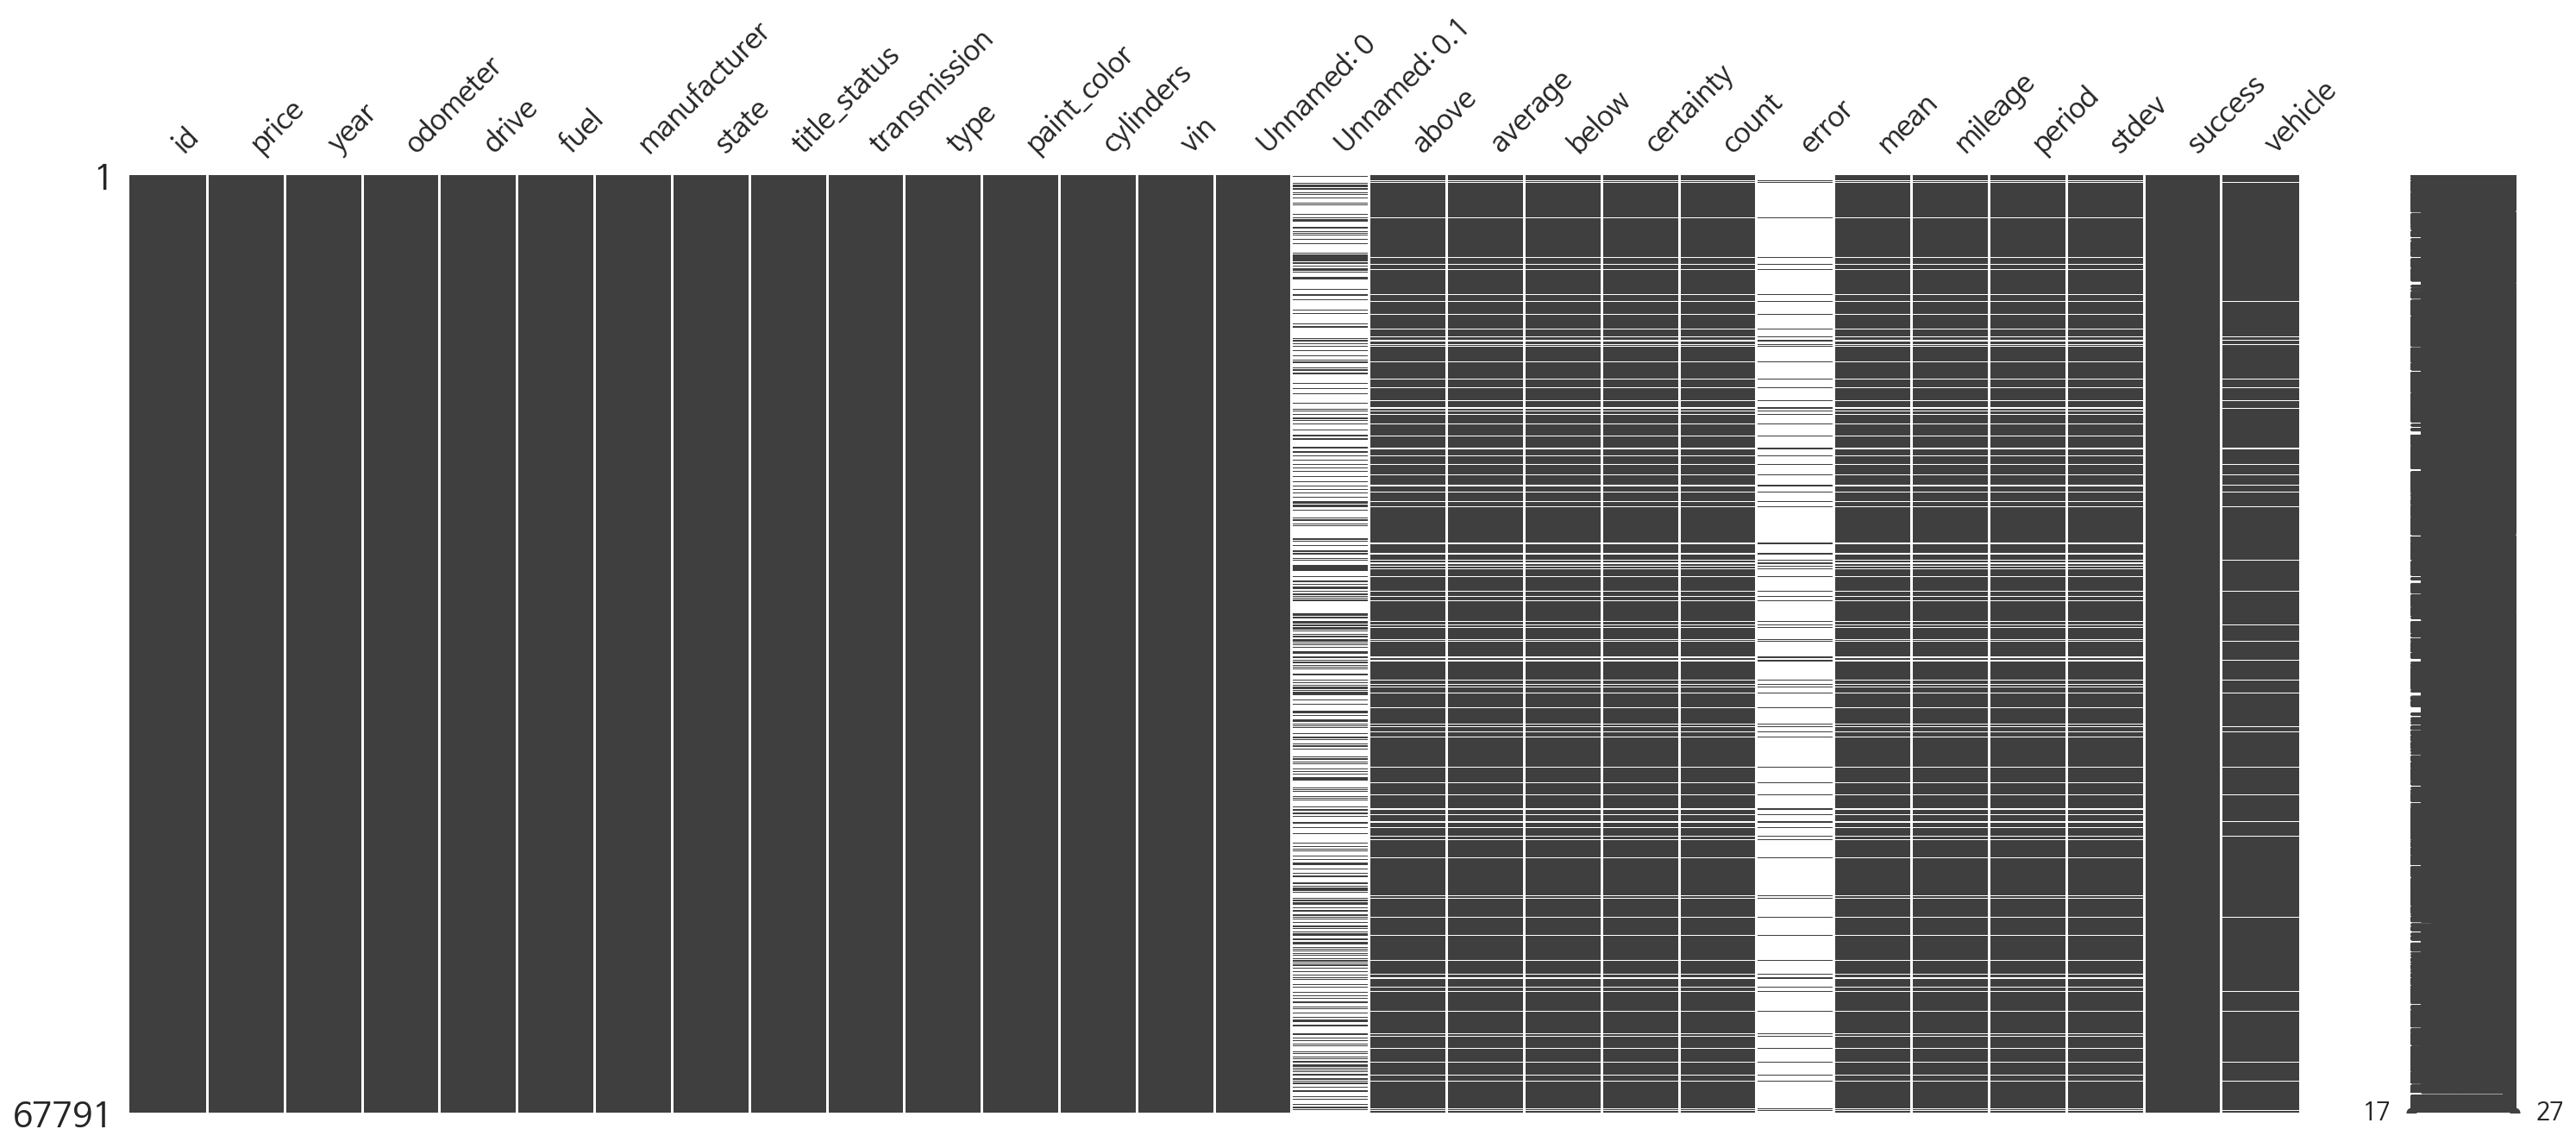

In [749]:
msno.matrix(final)

In [756]:
# error 컬럼 확인

In [759]:
final[final['error'] == 'no_data']

,id,price,year,odometer,drive,fuel,manufacturer,state,title_status,transmission,type,paint_color,cylinders,vin,Unnamed: 0,Unnamed: 0.1,above,average,below,certainty,count,error,mean,mileage,period,stdev,success,vehicle
4,7033472903,105500,2017.0,35000.0,4wd,diesel,mercedes-benz,ut,clean,other,van,blue,6 cylinders,WD4FE7CD1HP550108,6605,NaN,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,2017 Mercedes-Benz Sprinter (2500 144 WB Crew)
31,7045957974,2000,1998.0,214048.0,4wd,gas,gmc,ut,clean,automatic,SUV,white,8 cylinders,1GKFK16R5WJ716920,3175,176.0,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,1998 GMC Suburban 1500
36,7044024149,6900,1991.0,154800.0,rwd,gas,ford,ut,clean,automatic,hatchback,red,8 cylinders,1FACP41E2MF183467,14032,3035.0,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,1991 Ford Mustang LX 5.0
48,7041662449,3750,2000.0,137000.0,rwd,gas,dodge,ut,clean,automatic,truck,black,8 cylinders,1B7GL2AZ1YS637378,328,328.0,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,2000 Dodge Dakota (Quad Cab Sport 2WD)
55,7041078737,7295,2009.0,53577.0,rwd,gas,chevrolet,ut,clean,automatic,truck,white,5 cylinders,1GCCS19E298156924,8565,NaN,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,2009 Chevrolet Colorado LT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67710,7039747045,10995,2012.0,421864.0,rwd,diesel,mercedes-benz,ut,clean,automatic,van,white,6 cylinders,WD3PE8CC3C5648812,136,136.0,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,2012 Mercedes-Benz Sprinter (2500 170 WB Cargo)
67720,7039427991,30000,1982.0,154000.0,4wd,gas,jeep,ut,clean,manual,pickup,red,6 cylinders,1JCCM88E0CT044761,14232,3235.0,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,1982 Jeep Scrambler CJ8
67732,7037896502,1995,1999.0,140000.0,rwd,gas,dodge,ut,clean,automatic,SUV,red,8 cylinders,1B4HR28Z1XF678008,19151,1157.0,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,1999 Dodge Durango SLT
67736,7037776485,34995,2008.0,111352.0,4wd,diesel,gmc,ut,clean,automatic,truck,white,8 cylinders,1GDE4E39X8F400315,1624,NaN,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,2008 GMC C4e042


In [767]:
final[(final['year'] < 1980)]

,id,price,year,odometer,drive,fuel,manufacturer,state,title_status,transmission,type,paint_color,cylinders,vin,Unnamed: 0,Unnamed: 0.1,above,average,below,certainty,count,error,mean,mileage,period,stdev,success,vehicle
14,7048798803,7500,1950.0,1000.0,fwd,gas,dodge,ut,clean,automatic,truck,grey,8 cylinders,83350765,5980,NaN,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN
16,7048747524,6000,1955.0,0.0,fwd,gas,chrysler,ut,clean,automatic,coupe,grey,8 cylinders,W5526296,6648,NaN,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN
32,7045888501,2000,1977.0,100000.0,4wd,gas,chevrolet,ut,clean,automatic,pickup,red,8 cylinders,CKR147Z167007,3342,NaN,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN
67,7038815261,6000,1964.0,67000.0,rwd,gas,chrysler,ut,clean,automatic,sedan,red,8 cylinders,8243195925,3269,NaN,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,
169,7046814581,5000,1978.0,41091.0,rwd,gas,ford,vt,missing,manual,truck,black,6 cylinders,F25BCBE3221,3850,NaN,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67587,7033797804,9500,1972.0,84635.0,4wd,gas,chevrolet,tx,clean,automatic,SUV,blue,8 cylinders,CKE182S100546,2400,NaN,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN
67625,7035538222,13500,1978.0,100000.0,rwd,diesel,chevrolet,ut,clean,manual,truck,black,6 cylinders,CCS348Z123088,3356,NaN,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN
67634,7047652804,19999,1979.0,7084.0,rwd,gas,pontiac,ut,clean,automatic,coupe,black,8 cylinders,00002W87K9L181622,5105,NaN,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN
67635,7047652723,18499,1972.0,40022.0,rwd,gas,dodge,ut,clean,automatic,coupe,black,8 cylinders,0000JH23G2B466009,4323,NaN,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN


In [773]:
final[(final['error'] == 'no_data') & (final['year'] < 1980)]

,id,price,year,odometer,drive,fuel,manufacturer,state,title_status,transmission,type,paint_color,cylinders,vin,Unnamed: 0,Unnamed: 0.1,above,average,below,certainty,count,error,mean,mileage,period,stdev,success,vehicle
67,7038815261,6000,1964.0,67000.0,rwd,gas,chrysler,ut,clean,automatic,sedan,red,8 cylinders,8243195925,3269,NaN,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,
361,7038326141,6950,1959.0,60420.0,rwd,gas,ford,vt,clean,automatic,sedan,red,8 cylinders,B9AS173180,6035,NaN,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,
1065,7047202367,4500,1974.0,60003.0,rwd,gas,volkswagen,va,clean,manual,sedan,black,4 cylinders,1342344334,6168,NaN,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,
5810,7047042835,26500,1957.0,963.0,rwd,gas,chevrolet,wi,clean,manual,sedan,green,6 cylinders,B57S255076,5989,NaN,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,
8892,7049746361,48000,1951.0,2909.0,rwd,gas,gmc,az,clean,automatic,pickup,red,8 cylinders,A228374614,5783,NaN,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,
9063,7049438542,19500,1953.0,60000.0,rwd,gas,chevrolet,az,clean,automatic,coupe,red,8 cylinders,A530058811,6186,NaN,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,
9646,7045624180,35450,1957.0,0.0,fwd,gas,ford,az,clean,automatic,convertible,custom,8 cylinders,D7FH181321,6634,NaN,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,
10916,7047839480,18000,1954.0,37834.0,rwd,gas,chevrolet,ca,clean,manual,sedan,blue,6 cylinders,B54S010320,5327,NaN,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,
11964,7048524215,28500,1971.0,60500.0,rwd,gas,volkswagen,ca,clean,manual,bus,custom,4 cylinders,221203S290,5997,NaN,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,
12058,7048552163,16000,1957.0,0.0,rwd,gas,ford,ca,clean,manual,other,white,8 cylinders,D7FH163824,6687,NaN,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,


In [783]:
final[(final['vehicle'].notnull()) & (final['success'] == False)]

,id,price,year,odometer,drive,fuel,manufacturer,state,title_status,transmission,type,paint_color,cylinders,vin,Unnamed: 0,Unnamed: 0.1,above,average,below,certainty,count,error,mean,mileage,period,stdev,success,vehicle
4,7033472903,105500,2017.0,35000.0,4wd,diesel,mercedes-benz,ut,clean,other,van,blue,6 cylinders,WD4FE7CD1HP550108,6605,NaN,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,2017 Mercedes-Benz Sprinter (2500 144 WB Crew)
31,7045957974,2000,1998.0,214048.0,4wd,gas,gmc,ut,clean,automatic,SUV,white,8 cylinders,1GKFK16R5WJ716920,3175,176.0,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,1998 GMC Suburban 1500
36,7044024149,6900,1991.0,154800.0,rwd,gas,ford,ut,clean,automatic,hatchback,red,8 cylinders,1FACP41E2MF183467,14032,3035.0,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,1991 Ford Mustang LX 5.0
48,7041662449,3750,2000.0,137000.0,rwd,gas,dodge,ut,clean,automatic,truck,black,8 cylinders,1B7GL2AZ1YS637378,328,328.0,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,2000 Dodge Dakota (Quad Cab Sport 2WD)
55,7041078737,7295,2009.0,53577.0,rwd,gas,chevrolet,ut,clean,automatic,truck,white,5 cylinders,1GCCS19E298156924,8565,NaN,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,2009 Chevrolet Colorado LT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67710,7039747045,10995,2012.0,421864.0,rwd,diesel,mercedes-benz,ut,clean,automatic,van,white,6 cylinders,WD3PE8CC3C5648812,136,136.0,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,2012 Mercedes-Benz Sprinter (2500 170 WB Cargo)
67720,7039427991,30000,1982.0,154000.0,4wd,gas,jeep,ut,clean,manual,pickup,red,6 cylinders,1JCCM88E0CT044761,14232,3235.0,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,1982 Jeep Scrambler CJ8
67732,7037896502,1995,1999.0,140000.0,rwd,gas,dodge,ut,clean,automatic,SUV,red,8 cylinders,1B4HR28Z1XF678008,19151,1157.0,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,1999 Dodge Durango SLT
67736,7037776485,34995,2008.0,111352.0,4wd,diesel,gmc,ut,clean,automatic,truck,white,8 cylinders,1GDE4E39X8F400315,1624,NaN,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,2008 GMC C4e042


In [771]:
final[(final['error'] == 'invalid_vin') & (final['year'] < 1980)]

,id,price,year,odometer,drive,fuel,manufacturer,state,title_status,transmission,type,paint_color,cylinders,vin,Unnamed: 0,Unnamed: 0.1,above,average,below,certainty,count,error,mean,mileage,period,stdev,success,vehicle
14,7048798803,7500,1950.0,1000.0,fwd,gas,dodge,ut,clean,automatic,truck,grey,8 cylinders,83350765,5980,NaN,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN
16,7048747524,6000,1955.0,0.0,fwd,gas,chrysler,ut,clean,automatic,coupe,grey,8 cylinders,W5526296,6648,NaN,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN
32,7045888501,2000,1977.0,100000.0,4wd,gas,chevrolet,ut,clean,automatic,pickup,red,8 cylinders,CKR147Z167007,3342,NaN,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN
169,7046814581,5000,1978.0,41091.0,rwd,gas,ford,vt,missing,manual,truck,black,6 cylinders,F25BCBE3221,3850,NaN,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN
319,7040059251,3800,1956.0,59000.0,rwd,gas,ford,vt,missing,manual,truck,green,8 cylinders,F80K6H34371,6572,NaN,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67587,7033797804,9500,1972.0,84635.0,4wd,gas,chevrolet,tx,clean,automatic,SUV,blue,8 cylinders,CKE182S100546,2400,NaN,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN
67625,7035538222,13500,1978.0,100000.0,rwd,diesel,chevrolet,ut,clean,manual,truck,black,6 cylinders,CCS348Z123088,3356,NaN,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN
67634,7047652804,19999,1979.0,7084.0,rwd,gas,pontiac,ut,clean,automatic,coupe,black,8 cylinders,00002W87K9L181622,5105,NaN,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN
67635,7047652723,18499,1972.0,40022.0,rwd,gas,dodge,ut,clean,automatic,coupe,black,8 cylinders,0000JH23G2B466009,4323,NaN,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN


In [662]:
name_split = final["vehicle"].str.split(" ")

final["make"] = name_split.str.get(1)

In [669]:
final['make'] = final['make'].str.lower()

In [689]:
test = final[final['manufacturer'] != final['make']]

In [690]:
test = test[test['make'].notnull()]

In [694]:
test['manufacturer'].unique()

array(['ram', 'chrysler', 'rover', 'mercedes-benz', 'honda', 'ford',
       'nissan', 'dodge', 'alfa-romeo', 'volkswagen', 'hyundai', 'toyota',
       'jeep', 'chevrolet', 'mini', 'gmc', 'mitsubishi', 'kia',
       'infiniti', 'mercury', 'bmw', 'audi', 'land rover', 'aston-martin',
       'porche', 'harley-davidson', 'buick', 'cadillac', 'mazda',
       'pontiac', 'subaru', 'lincoln', 'datsun', 'volvo', 'acura'],
      dtype=object)

# 추가로 크롤링 해야할것


In [904]:
for_last = df[~df['vin'].isin(list(set(final_drop_dupli['vin'])))].sort_values(by=['price'])
for_last.shape

(6881, 14)

In [923]:
for_last[['id','vin','odometer','price']][1085:1086]

,id,vin,odometer,price
453740,7037404650,00000000000000000,152000.0,3700


In [941]:
result_list14 = []
result = {}
# [start_num:end_num]에 각각 숫자를 넣어 주세요!
for i in for_last[['id','vin','odometer','price']][6390:].index:
    vin = for_last.get_value(i,"vin")
    odometer = for_last.get_value(i,"odometer")
    id_ = for_last.get_value(i,"id")
    url = 'https://marketvalue.vinaudit.com/getmarketvalue.php?key=1HB7ICF9L0GVH5Q&vin={}&mileage={}&country=USA'.format(vin, odometer)
#     time.sleep(1)
    response = requests.get(url)
    jsonresponse = response.json()
    for k, v in jsonresponse.items():
        if k == 'prices':
            for key, value in v.items():
                result[key] = value
                result['og_vin'] = vin
                result['id'] = id_
        else:
            result[k] = v
            result['og_vin'] = vin
            result['id'] = id_

    result_list14.append(result)
    result = {}

In [980]:
result_list16 = []
result = {}
# [start_num:end_num]에 각각 숫자를 넣어 주세요!
for i in real_last[['id','vin','odometer','price']][24:].index:
    vin = for_last.get_value(i,"vin")
    odometer = for_last.get_value(i,"odometer")
    id_ = for_last.get_value(i,"id")
    url = 'https://marketvalue.vinaudit.com/getmarketvalue.php?key=1HB7ICF9L0GVH5Q&vin={}&mileage={}&country=USA'.format(vin, odometer)
#     time.sleep(1)
    response = requests.get(url)
    jsonresponse = response.json()
    for k, v in jsonresponse.items():
        if k == 'prices':
            for key, value in v.items():
                result[key] = value
                result['og_vin'] = vin
                result['id'] = id_
        else:
            result[k] = v
            result['og_vin'] = vin
            result['id'] = id_

    result_list16.append(result)
    result = {}

In [975]:
len(result_list15)

23

In [978]:
real_last.iloc[23]

id                     7037404650
price                        3700
year                         2005
odometer                   152000
drive                         fwd
fuel                          gas
manufacturer                acura
state                          ri
title_status                clean
transmission            automatic
type                        sedan
paint_color                  grey
cylinders             6 cylinders
vin             00000000000000000
Name: 453740, dtype: object

In [982]:
last4 = pd.concat([pd.DataFrame(result_list10),pd.DataFrame(result_list11),pd.DataFrame(result_list12),pd.DataFrame(result_list13),pd.DataFrame(result_list14),pd.DataFrame(result_list15),pd.DataFrame(result_list16)])

In [984]:
last4 = last4.drop_duplicates('vin',keep='first')

In [985]:
len(last4)

6855

In [963]:
last4 = last4.drop_duplicates('vin',keep='first')

In [970]:
real_last=for_last[~for_last['vin'].isin(list(set(for_last5['vin'])))].sort_values(by=['price'])

In [927]:
pd.DataFrame(result_list11).to_csv('./data/final_crawling2.csv')

In [928]:
len(result_list11)

305

In [929]:
1086 + 305

1391

In [931]:
pd.DataFrame(result_list12).to_csv('./data/final_crawling3.csv')

In [932]:
len(result_list12)

3713

In [938]:
3713 + 1391 + 1287

6391

In [936]:
pd.DataFrame(result_list13).to_csv('./data/final_crawling4.csv')

In [937]:
len(result_list13)

1287

In [942]:
pd.DataFrame(result_list14).to_csv('./data/final_crawling5.csv')

In [943]:
len(result_list14)

491

In [ ]:
pd.DataFrame(result_list15).to_csv('./data/final_crawling6.csv')

In [2]:
for_vin_crawling = pd.read_csv('./last_crawling.csv')

In [3]:
for_vin_crawling.head()

,Unnamed: 0,id,price,year,odometer,drive,fuel,manufacturer,state,title_status,transmission,type,paint_color,cylinders,vin,condition,size
0,569,7036765317,1300,2009.0,178784.0,rwd,gas,chevrolet,ut,clean,automatic,sedan,silver,6 cylinders,1G1zg57b69f225923,fair,full-size
1,652,7032788005,4500,2007.0,140000.0,rwd,gas,jeep,ut,clean,automatic,SUV,grey,6 cylinders,1j8gr48k87c541168,good,other
2,696,7049929102,6850,2010.0,125000.0,4wd,gas,honda,vt,clean,automatic,SUV,blue,4 cylinders,5j6re4h34al024777,excellent,other
3,711,7049793963,500,2003.0,148500.0,fwd,gas,volkswagen,vt,missing,automatic,sedan,black,4 cylinders,3vwpe69mx3m189697,fair,full-size
4,1159,7047885667,5800,2005.0,148000.0,4wd,gas,toyota,vt,clean,automatic,SUV,silver,6 cylinders,Vin in Pic,good,other


In [28]:
result_list2= []
result = {}
# [start_num:end_num]에 각각 숫자를 넣어 주세요!
for i in for_vin_crawling[['vin','odometer']][708:].index:
    vin = for_vin_crawling.get_value(i,"vin")
    odometer = for_vin_crawling.get_value(i,"odometer")
    url = 'https://marketvalue.vinaudit.com/getmarketvalue.php?key=1HB7ICF9L0GVH5Q&vin={}&mileage={}&country=USA'.format(vin, odometer)
#     time.sleep(1)
    response = requests.get(url)
    jsonresponse = response.json()
    for k, v in jsonresponse.items():
        if k == 'prices':
            for key, value in v.items():
                result[key] = value
        else:
            result[k] = v

    result_list2.append(result)
    result = {}

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [34]:
result_list3 = []
result = {}
# [start_num:end_num]에 각각 숫자를 넣어 주세요!
for i in for_vin_crawling[['vin','odometer']][2999:].index:
    vin = for_vin_crawling.get_value(i,"vin")
    odometer = for_vin_crawling.get_value(i,"odometer")
    url = 'https://marketvalue.vinaudit.com/getmarketvalue.php?key=1HB7ICF9L0GVH5Q&vin={}&mileage={}&country=USA'.format(vin, odometer)
#     time.sleep(1)
    response = requests.get(url)
    jsonresponse = response.json()
    for k, v in jsonresponse.items():
        if k == 'prices':
            for key, value in v.items():
                result[key] = value
        else:
            result[k] = v

    result_list3.append(result)
    result = {}

In [29]:
result_list_df = pd.DataFrame(result_list)
result_list_df

,vin,vehicle,mileage,success,count,mean,stdev,certainty,period,average,below,above,error
0,1G1ZG57B69F225923,2009 Chevrolet Malibu LS,178784.0,True,29.0,4784.59,1357.0,96.4,"[2019-10-09, 2020-03-31]",4784.59,3427.59,6141.59,NaN
1,1J8GR48K87C541168,2007 Jeep Grand Cherokee Laredo,140000.0,True,56.0,6813.92,1499.0,99.0,"[2019-10-09, 2020-03-31]",6813.92,5314.92,8312.92,NaN
2,5J6RE4H34AL024777,2010 Honda CR-V LX,125000.0,True,55.0,8789.80,1459.0,99.0,"[2019-10-10, 2020-03-31]",8789.80,7330.80,10248.80,NaN
3,3VWPE69MX3M189697,2003 Volkswagen Jetta (Wolfsburg Edition),NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no_data
4,VIN IN PIC,,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no_data
...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,2G2WP552781101280,2008 Pontiac Grand Prix Base,124820.0,True,31.0,5352.71,1186.0,97.0,"[2019-10-10, 2020-03-31]",5352.71,4166.71,6538.71,NaN
704,1FDWF37S93ED16680,2003 Ford F-350 SD (XL 4WD DRW),NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no_data
705,5N1ED28Y5YC563714,2000 Nissan Xterra XE 4WD,217000.0,True,4.0,3395.30,593.0,65.0,"[2019-10-11, 2020-03-27]",3395.30,2802.30,3988.30,NaN
706,36NEK18R4V6190727,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,invalid_vin


In [30]:
result_list2_df = pd.DataFrame(result_list2)
result_list2_df

,vin,vehicle,success,error,mileage,count,mean,stdev,certainty,period,average,below,above
0,4S3BH6659Y7638760,2000 Subaru Outback Wagon,False,no_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4T1BK1EB7FU153572,2015 Toyota Avalon XLE,True,NaN,89836.0,210.0,15294.37,2582.0,99.0,"[2019-10-10, 2020-03-31]",15294.37,12712.37,17876.37
2,1GCEK19Y47Z575710,2007 Chevrolet Silverado 1500 LTZ,True,NaN,191316.0,4.0,7629.06,1888.0,65.0,"[2019-10-12, 2020-03-07]",7629.06,5741.06,9517.06
3,1JCCF87E1GT142893,1986 Jeep CJ-7 (Base 2dr 4WD SUV),False,no_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,WDBPJ75J85A044205,2005 Mercedes-Benz CL-Class CL500,True,NaN,157812.0,1.0,2646.47,0.0,25.0,"[2020-03-08, 2020-03-08]",2646.47,2646.47,2646.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2285,468TF6872,NaN,False,invalid_vin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2286,1HGCM554X7A193337,2007 Honda Accord LX,True,NaN,163500.0,4.0,5043.65,902.0,65.0,"[2019-10-10, 2020-03-31]",5043.65,4141.65,5945.65
2287,1FTWW33F2XEB76278,1999 Ford F-350 SD (XL Crew Cab SWB DRW 4WD),True,NaN,254000.0,6.0,10059.48,1655.0,74.2,"[2020-01-13, 2020-03-31]",10059.48,8404.48,11714.48
2288,DTSXXXXX,NaN,False,invalid_vin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
pd.concat([result_list_df, result_list2_df],axis=0)

,above,average,below,certainty,count,error,mean,mileage,period,stdev,success,vehicle,vin
0,6141.59,4784.59,3427.59,96.4,29.0,NaN,4784.59,178784.0,"[2019-10-09, 2020-03-31]",1357.0,True,2009 Chevrolet Malibu LS,1G1ZG57B69F225923
1,8312.92,6813.92,5314.92,99.0,56.0,NaN,6813.92,140000.0,"[2019-10-09, 2020-03-31]",1499.0,True,2007 Jeep Grand Cherokee Laredo,1J8GR48K87C541168
2,10248.80,8789.80,7330.80,99.0,55.0,NaN,8789.80,125000.0,"[2019-10-10, 2020-03-31]",1459.0,True,2010 Honda CR-V LX,5J6RE4H34AL024777
3,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,2003 Volkswagen Jetta (Wolfsburg Edition),3VWPE69MX3M189697
4,NaN,NaN,NaN,NaN,NaN,no_data,NaN,NaN,NaN,NaN,False,,VIN IN PIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2285,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN,468TF6872
2286,5945.65,5043.65,4141.65,65.0,4.0,NaN,5043.65,163500.0,"[2019-10-10, 2020-03-31]",902.0,True,2007 Honda Accord LX,1HGCM554X7A193337
2287,11714.48,10059.48,8404.48,74.2,6.0,NaN,10059.48,254000.0,"[2020-01-13, 2020-03-31]",1655.0,True,1999 Ford F-350 SD (XL Crew Cab SWB DRW 4WD),1FTWW33F2XEB76278
2288,NaN,NaN,NaN,NaN,NaN,invalid_vin,NaN,NaN,NaN,NaN,False,NaN,DTSXXXXX


In [35]:
result_list3_df = pd.DataFrame(result_list3)
result_list3_df

,vin,vehicle,mileage,success,count,mean,stdev,certainty,period,average,below,above,error
0,JN8AS58V09W437619,2009 Nissan Rogue S,105000.0,True,52.0,7192.81,1213.0,99.0,"[2019-10-10, 2020-03-31]",7192.81,5979.81,8405.81,NaN
1,1G1YD3D7765114924,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,invalid_vin
2,1FTNF20559EA13872,2009 Ford F-250 Super Duty XL,30000.0,True,2.0,12913.73,47.0,44.3,"[2020-03-11, 2020-03-29]",12913.73,12866.73,12960.73,NaN
3,WDBUF26J96A945056,2006 Mercedes-Benz E-Class E320 CDI,192323.0,True,1.0,2183.84,0.0,25.0,"[2020-03-26, 2020-03-26]",2183.84,2183.84,2183.84,NaN
4,2G1165S31F9138273,2015 Chevrolet Impala LTZ,59000.0,True,190.0,17979.67,2679.0,99.0,"[2019-10-11, 2020-03-31]",17979.67,15300.67,20658.67,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,JTDBR32E252054145,2005 Toyota Corolla CE,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no_data
329,1FDXF47R08ED23936,2008 Ford F-450 SD (Regular Cab 4WD DRW),91947.0,True,3.0,20072.27,2380.0,57.3,"[2020-03-08, 2020-03-30]",20072.27,17692.27,22452.27,NaN
330,19XFC1F32GE007607,2016 Honda Civic EX-T,60200.0,True,296.0,15575.46,1498.0,99.0,"[2019-10-10, 2020-03-31]",15575.46,14077.46,17073.46,NaN
331,5F07C668817,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,invalid_vin


In [36]:
df = pd.concat([result_list_df, result_list2_df,result_list3_df],axis=0)

In [37]:
df.shape

(3331, 13)

In [38]:
df.to_csv('./vin_crawling_addtional.csv')